# Imports

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# Leitura dos dados

Os dados das tracks serão utilizados somente na lingua portuguesa

In [2]:
def get_data(dir= 'data', split= 'train', track= 'a', language= 'ptbr'):
    
    archive = language + '.csv' if split == 'train' else language + '_' + track + '.csv'

    path = f'{dir}/{split}/track_{track}/{archive}'
    
    return pd.read_csv(path)

In [4]:
track_a = get_data(track= 'a')
track_b = get_data(track= 'b')

In [7]:
track_a.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,ptbr_train_track_a_00001,"minha vó me disse que era frango e eu comi, ti...",0,0,0,0,1,0
1,ptbr_train_track_a_00002,Está e a nossa deputada Benedita linda guerrei...,0,0,0,1,0,0
2,ptbr_train_track_a_00003,só falta as roupas kkkkkkkkkkk,0,0,0,1,0,0
3,ptbr_train_track_a_00004,Eu tmb. Comecei a sair de casa agora (fui pela...,0,0,0,0,1,0
4,ptbr_train_track_a_00005,Peço a Deus que nossos dirigentes tenham realm...,0,0,0,0,0,0


In [8]:
track_b.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,ptbr_train_track_b_00001,Essa é a democracia e liberdade que a e seu p...,1,0,0,0,0,0
1,ptbr_train_track_b_00002,fiz isso! vou ficar prestando atenção se o che...,0,0,0,0,0,0
2,ptbr_train_track_b_00003,anao meu irmao ta em casa kk lixo,1,0,0,0,1,0
3,ptbr_train_track_b_00004,"Mas... a pandemia vem pra ficar, meu chapa. At...",0,0,2,0,0,0
4,ptbr_train_track_b_00005,Não entendi o post. Está enaltecendo a invasão...,2,1,0,0,0,0


# Análise dos dados

A primeira pergunta que surge é: Temos os mesmos textos para as diferentes tracks?

In [ ]:
if set(track_a['text']) == set(track_b['text']):
    print("Tracks com textos iguais.")
else:
    print("Tracks com textos diferentes.")

Tracks com textos iguais.


Temos então os mesmos textos de treino para as tracks, podemos então enxergar o dataset da track B como o exato mesmo dataset da track A, porém com intensidade atribuida as emoções

Pergunta: Qual o tamanho médio, mínimo e máximo dos textos

In [ ]:
word_counts = track_a['text'].apply(lambda x: len(x.split()))
average_word_count = word_counts.mean()
min_word_count = word_counts.min()
max_word_count = word_counts.max()

# Imprimindo os resultados
print(f"Tamanho mínimo da coluna 'text' em palavras: {min_word_count}")
print(f"Tamanho médio da coluna 'text' em palavras: {average_word_count:.2f}")
print(f"Tamanho máximo da coluna 'text' em palavras: {max_word_count}")

Tamanho mínimo da coluna 'text' em palavras: 3
Tamanho médio da coluna 'text' em palavras: 20.74
Tamanho máximo da coluna 'text' em palavras: 463


In [42]:
percentiles = word_counts.quantile([0.15 ,0.35 ,0.5, 0.75, 0.85, 0.95])

print("Percentis da coluna 'text' em palavras:")
print(f"15%: {percentiles[0.15]}")
print(f"35%: {percentiles[0.35]}")
print(f"50% (Mediana): {percentiles[0.5]}")
print(f"75%: {percentiles[0.75]}")
print(f"85%: {percentiles[0.85]}")
print(f"95%: {percentiles[0.95]}")

Percentis da coluna 'text' em palavras:
15%: 6.0
35%: 11.0
50% (Mediana): 14.0
75%: 26.0
85%: 35.0
95%: 53.0


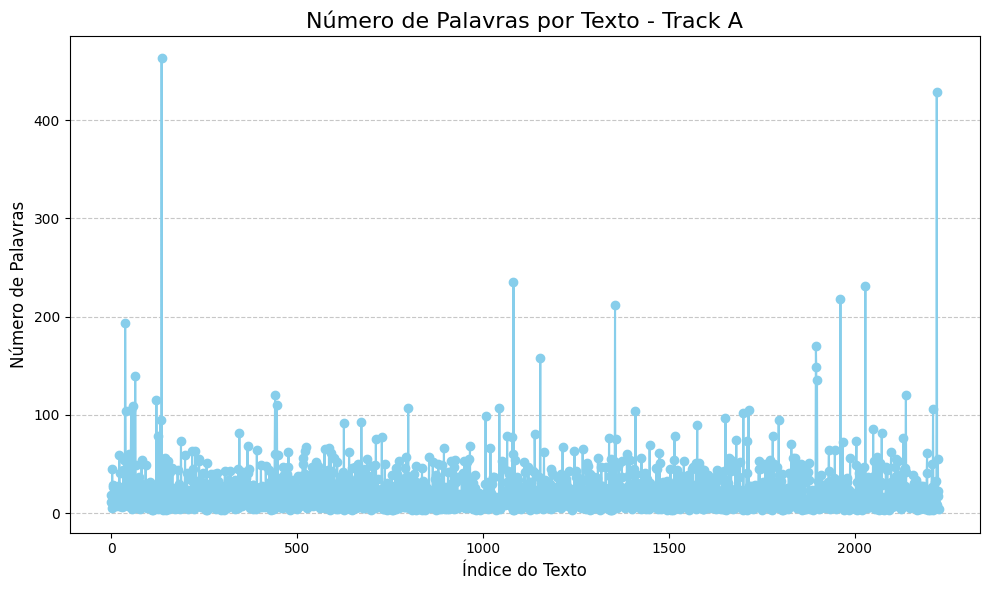

In [ ]:
word_counts = track_a['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
word_counts.plot(kind='line', marker='o', color='skyblue')

plt.title('Número de Palavras por Texto - Track A', fontsize=16)
plt.xlabel('Índice do Texto', fontsize=12)
plt.ylabel('Número de Palavras', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pergunta: Temos textos que não possuem nenhum sentimento associado (neutros)

In [ ]:
classes_a = track_a.drop(columns=['id', 'text'])
classes_b = track_b.drop(columns=['id', 'text'])

no_class_a = (classes_a.sum(axis=1) == 0)
no_class_b = (classes_b.gt(0).sum(axis=1) == 0)

no_class_count_a = no_class_a.sum()
no_class_count_b = no_class_b.sum()

print(f"Número de linhas sem nenhuma classe associada em track_a: {no_class_count_a}")
print(f"Número de linhas sem nenhuma classe associada em track_b: {no_class_count_b}")

Número de linhas sem nenhuma classe associada em track_a: 632
Número de linhas sem nenhuma classe associada em track_b: 612


Aqui percebi que algo inesperado aconteceu, não deveriamos ter diferença nessa métrica para ambos datasets, visto que eles possuem os mesmos texto com diferença unica no valor dos rótulos, mas não em sua ausência ou presença

In [ ]:
no_class_texts_a = set(track_a.loc[no_class_a, 'text'])
no_class_texts_b = set(track_b.loc[no_class_b, 'text'])

only_in_a = no_class_texts_a - no_class_texts_b
only_in_b = no_class_texts_b - no_class_texts_a

print(f"Textos sem classes apenas em track_a: {len(only_in_a)}")
print(f"Textos sem classes apenas em track_b: {len(only_in_b)}")


Textos sem classes apenas em track_a: 20
Textos sem classes apenas em track_b: 0


In [75]:
exclusive_a_rows = track_a[track_a['text'].isin(only_in_a)]
exclusive_b_rows = track_b[track_b['text'].isin(only_in_a)]

if not exclusive_b_rows.empty:
    print("Valores de intensidade em track_b para esses textos:")
    print(exclusive_b_rows.drop(columns=['id', 'text']))


Valores de intensidade em track_b para esses textos:
      Anger  Disgust  Fear  Joy  Sadness  Surprise
38        1        0     0    0        0         0
325       1        0     0    0        0         0
377       0        0     0    0        0         1
433       0        1     0    0        0         0
479       1        0     0    0        0         0
566       0        0     0    0        0         1
665       1        0     0    0        0         0
809       0        0     0    0        1         0
828       0        0     0    1        0         0
868       1        0     0    0        0         0
1099      1        0     0    0        0         0
1103      0        0     0    0        1         0
1233      0        0     0    0        1         0
1281      1        0     0    0        0         0
1357      1        0     0    1        0         0
1677      0        0     0    0        1         0
1689      0        0     0    0        1         0
1944      0        0     0   

A hipótese aqui é que como aumentamos o nível de granularidade das classes, temos um "maior grau de liberdade", textos que tinham que ser decididos entre 0 e 1  agora podem ir de 0 a 3. Assim, se tivessemos uma alta incerteza nessa classificação binária, poderiamos atribuir 1 na nova track sem perder sua significância. Isso é interessante, pois nos indica textos que possuem esse alto grau de incerteza na track A

Pergunta: Quantas ocorrências de cada emoção temos no dataset?

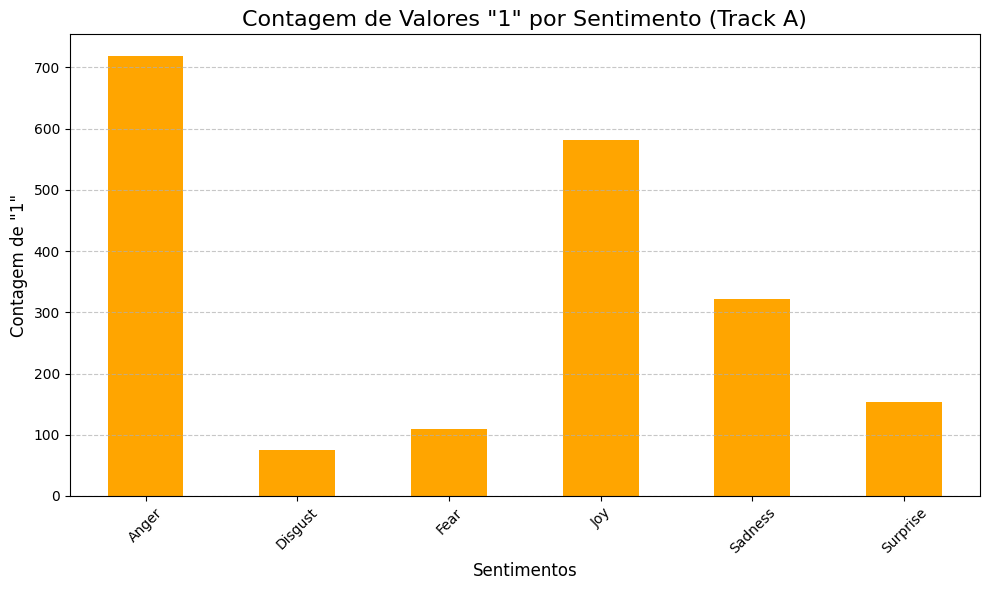

In [24]:
count_ones = (track_a.drop(columns=['id', 'text']) == 1).sum()

plt.figure(figsize=(10, 6))
count_ones.plot(kind='bar', color='orange')
plt.title('Contagem de Valores "1" por Sentimento (Track A)', fontsize=16)
plt.ylabel('Contagem de "1"', fontsize=12)
plt.xlabel('Sentimentos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pergunta: Temos sentimentos mais intensos que os outros?

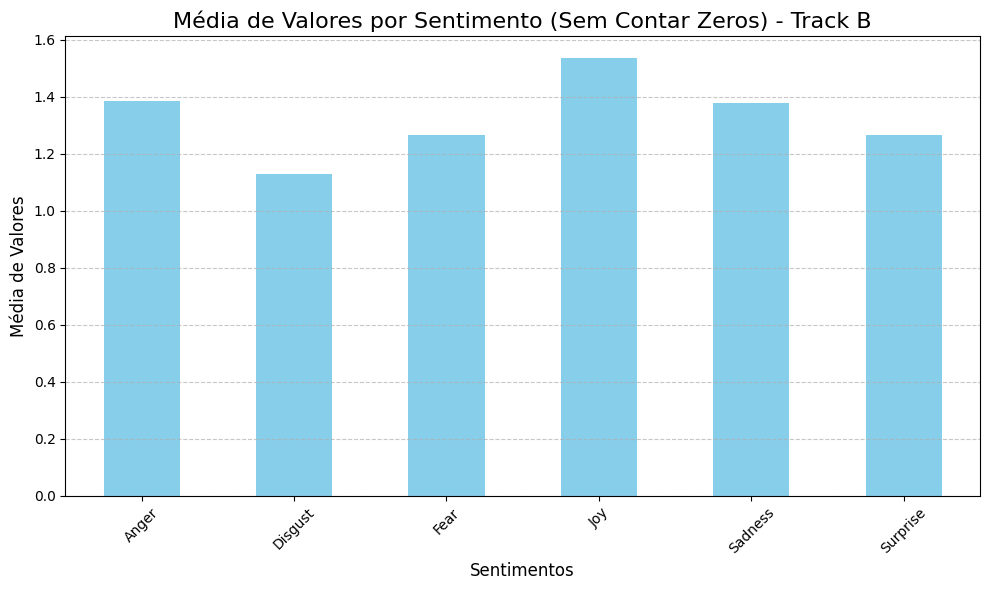

In [ ]:
track_b_feelings = track_b.drop(columns=['id', 'text'])

mean_non_zero = track_b_feelings[track_b_feelings != 0].mean()

plt.figure(figsize=(10, 6))
mean_non_zero.plot(kind='bar', color='skyblue')
plt.title('Média de Valores por Sentimento (Sem Contar Zeros) - Track B', fontsize=16)
plt.ylabel('Média de Valores', fontsize=12)
plt.xlabel('Sentimentos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Por outro lado, temos uma média de intensidade do sentimento próxima para as classes

Pergunta: Quantas emoções temos por texto?

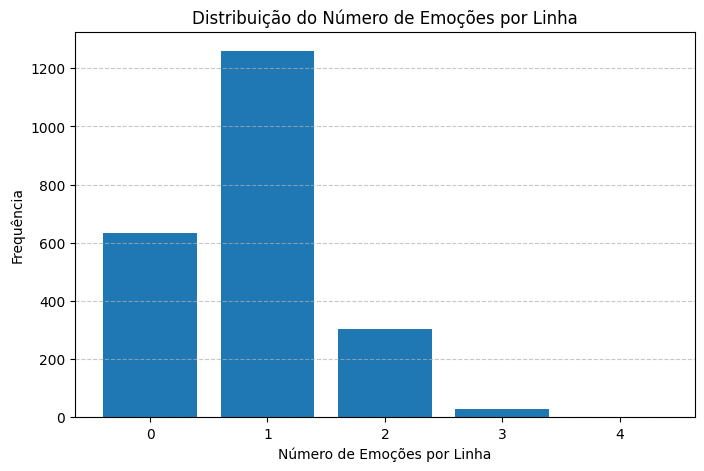

In [ ]:
emotion_counts = track_a.drop(columns=['id', 'text']).sum(axis=1)

emotion_distribution = emotion_counts.value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(emotion_distribution.index, emotion_distribution.values)
plt.xlabel("Número de Emoções por Linha")
plt.ylabel("Frequência")
plt.title("Distribuição do Número de Emoções por Linha")
plt.xticks(range(emotion_distribution.index.min(), emotion_distribution.index.max() + 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

É extremamente raro textos com mais de 2 emoções presentes, mas ainda existem, vamos observar um exemplo

In [ ]:
example_row_3 = track_a[track_a.drop(columns=['id', 'text']).sum(axis=1) == 3].iloc[0]
example_text_3 = example_row_3['text']
example_emotions_3 = example_row_3.drop(labels=['id', 'text'])[example_row_3.drop(labels=['id', 'text']) == 1].index.tolist()

example_row_4 = track_a[track_a.drop(columns=['id', 'text']).sum(axis=1) == 4].iloc[0]
example_text_4 = example_row_4['text']
example_emotions_4 = example_row_4.drop(labels=['id', 'text'])[example_row_4.drop(labels=['id', 'text']) == 1].index.tolist()

print("Exemplo com 3 emoções associadas:")
print(f"Texto: {example_text_3}")
print(f"Emoções associadas: {example_emotions_3}\n")

print("\n\n")

print("Exemplo com 4 emoções associadas:")
print(f"Texto: {example_text_4}")
print(f"Emoções associadas: {example_emotions_4}")

Exemplo com 3 emoções associadas:
Texto: ""No caso do PIB, o que comprometeu o resultado dos anos do PT no poder    foi de fato a gestão Dilma - e em especial seu segundo mandato", diz    Alessandra Ribeiro, economista da Consultoria Tendências."   Você leu o próprio link que postou? Vários dos especialistas comentam que vários dos índices pioraram no governo Dilma.
Emoções associadas: ['Anger', 'Sadness', 'Surprise']




Exemplo com 4 emoções associadas:
Texto: o tanto de comentario lixo vindo de homens nesse tweet eh assustador, de verdade mesmo.
Emoções associadas: ['Anger', 'Disgust', 'Fear', 'Sadness']


Pergunta: Quais emoções mais se associam?

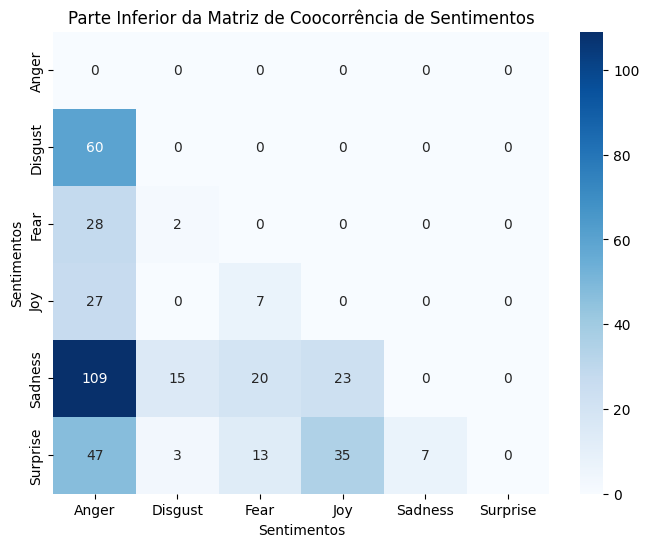

Top-3 associações de sentimentos:
1. Anger & Sadness: 109 vezes
2. Anger & Disgust: 60 vezes
3. Anger & Surprise: 47 vezes


In [ ]:
sentiments = track_a.drop(columns=['id', 'text'])
cooccurrence_matrix = sentiments.T.dot(sentiments)

for sentiment in cooccurrence_matrix.columns:
    cooccurrence_matrix.loc[sentiment, sentiment] = 0

lower_triangle_matrix = cooccurrence_matrix.where(
    np.tril(np.ones(cooccurrence_matrix.shape), k=-1).astype(bool)
)

lower_triangle_matrix = lower_triangle_matrix.fillna(0).astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(lower_triangle_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Parte Inferior da Matriz de Coocorrência de Sentimentos")
plt.xlabel("Sentimentos")
plt.ylabel("Sentimentos")
plt.show()

associations = []
for i, j in itertools.combinations(cooccurrence_matrix.columns, 2):
    count = cooccurrence_matrix.loc[i, j]
    if count > 0:
        associations.append((i, j, count))

associations = sorted(associations, key=lambda x: x[2], reverse=True)

print("Top-3 associações de sentimentos:")
for i, (sentiment1, sentiment2, count) in enumerate(associations[:3], 1):
    print(f"{i}. {sentiment1} & {sentiment2}: {count} vezes")
